In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
numEpocas = 100
     # Número de épocas.

tamanho = pd.read_csv('winequality-red.csv')
q = len(tamanho)  # Número de amostras

eta = 0.125            # Taxa de aprendizado

m = 6                # Número de neurônios na camada de entrada 
N = [10,10,10]         # Número de neurônios em cada camada escondida. A professora pediu minimo 3
L = 1                 # Número de neurônios na camada de saída. (-1 = Vinho ruim E 1 = Vinho bom)

In [61]:
# Dados

FixedAcidity = pd.read_csv('winequality-red.csv', usecols=[0])
FixedAcidity = np.array(FixedAcidity).flatten()

VolatileAcidity = pd.read_csv('winequality-red.csv', usecols=[1])
VolatileAcidity = np.array(VolatileAcidity).flatten()

CitricAcid = pd.read_csv('winequality-red.csv', usecols=[2])
CitricAcid = np.array(CitricAcid).flatten()

ResidualSugar = pd.read_csv('winequality-red.csv', usecols=[3])
ResidualSugar = np.array(ResidualSugar).flatten()

Chlorides = pd.read_csv('winequality-red.csv', usecols=[4])
Chlorides = np.array(Chlorides).flatten()

FreeSulfurDioxide = pd.read_csv('winequality-red.csv', usecols=[5])
FreeSulfurDioxide = np.array(FreeSulfurDioxide).flatten()

TotalSulfurDioxide = pd.read_csv('winequality-red.csv', usecols=[6])
TotalSulfurDioxide = np.array(TotalSulfurDioxide).flatten()

Density = pd.read_csv('winequality-red.csv', usecols=[7])
Density = np.array(Density).flatten()

pH = pd.read_csv('winequality-red.csv', usecols=[8])
pH = np.array(pH).flatten()

Sulphates = pd.read_csv('winequality-red.csv', usecols=[9])
Sulphates = np.array(Sulphates).flatten()

Alcohol = pd.read_csv('winequality-red.csv', usecols=[10])
Alcohol = np.array(Alcohol).flatten()

Quality = pd.read_csv('winequality-red.csv', usecols=[11])
Quality = np.array(Quality).flatten()


In [ ]:
# Entrada do perceptron
X = np.vstack((FixedAcidity, ResidualSugar, 
               TotalSulfurDioxide, Density, 
               pH, Alcohol))

# Resultado para saida
d = np.array([1 if q >= 6 else -1 for q in Quality])

# Bias
bias = 1

# Array para armazenar os erros.
E = np.zeros(q)
Etm = np.zeros(numEpocas)

# Matrizes de pesos
W1 = np.random.uniform(-0.5, 0.5, (N[0], m + 1))
W2 = np.random.uniform(-0.5, 0.5, (N[1], N[0] + 1))
W3 = np.random.uniform(-0.5, 0.5, (N[2], N[1] + 1))
W4 = np.random.uniform(-0.5, 0.5, (L, N[2] + 1))

# Funcoes
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def deriv_relu(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def deriv_softmax(x):
    return softmax(x) * (1 - softmax(x))

# caso queira testar com outra função só trocar aqui embaixo
funcao_ativacao = tanh  
derivada_funcao = deriv_tanh  

C:\Users\paulo\AppData\Local\Temp\ipykernel_668\746554044.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


i = 0   E = 0.4909593738192918
i = 1   E = 0.4891421019995632
i = 2   E = 0.4893552910484843
i = 3   E = 0.4897111350326425
i = 4   E = 0.48999617724830025
i = 5   E = 0.4902526442799082
i = 6   E = 0.49048728224558324
i = 7   E = 0.4907021502400709
i = 8   E = 0.49089331536038716
i = 9   E = 0.49105628706775034
i = 10   E = 0.4911901551048867
i = 11   E = 0.49129768171043336
i = 12   E = 0.4913833013192969
i = 13   E = 0.49145150521534864
i = 14   E = 0.49150613838902263
i = 15   E = 0.49155025745510206
i = 16   E = 0.4915862140966759
i = 17   E = 0.4916157953664993
i = 18   E = 0.49164035670977185
i = 19   E = 0.491660929990486
i = 20   E = 0.4916783059233901
i = 21   E = 0.4916930953109002
i = 22   E = 0.4917057740726638
i = 23   E = 0.49171671630425084
i = 24   E = 0.49172621862216925
i = 25   E = 0.491734518193788
i = 26   E = 0.49174180618497826
i = 27   E = 0.49174823786832017
i = 28   E = 0.4917539402826671
i = 29   E = 0.49175901808444467
i = 30   E = 0.4917635580534106
i = 31

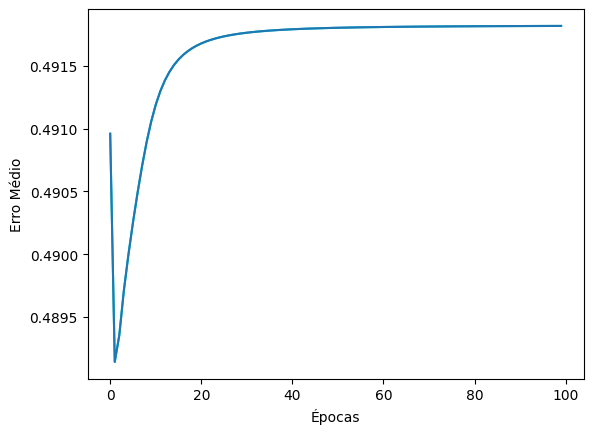

In [63]:
# ===============================================================
# TREINAMENTO.
# ===============================================================

for i in range(numEpocas): # repete conforme num de epococas
    for j in range(q):
        
        Xb = np.hstack((bias, X[:, j])) # empilhando junto com o bias

        # camada oculta 1
        o1 = funcao_ativacao(np.dot(W1, Xb))  
        o1b = np.insert(o1, 0, bias)

        # camada oculta 2
        o2 = funcao_ativacao(np.dot(W2, o1b))
        o2b = np.insert(o2, 0, bias)

        # camada oculta 3
        o3 = funcao_ativacao(np.dot(W3, o2b))  
        o3b = np.insert(o3, 0, bias)
        
        # Saida
        Y = funcao_ativacao(np.dot(W4, o3b))

        # Erro 
        e = d[j] - Y  

        # Erro total
        E[j] = (e.transpose().dot(e))/2  

        delta4 = e * derivada_funcao(Y)
        vdelta3 = W4.T.dot(delta4)
        delta3 = vdelta3[1:] * derivada_funcao(o3)

        vdelta2 = W3.T.dot(delta3)
        delta2 = vdelta2[1:] * derivada_funcao(o2)

        vdelta1 = W2.T.dot(delta2)
        delta1 = vdelta1[1:] * derivada_funcao(o1)

        # Atualização dos pesos.
        W4 += eta * np.outer(delta4, o3b)
        W3 += eta * np.outer(delta3, o2b)
        W2 += eta * np.outer(delta2, o1b)
        W1 += eta * np.outer(delta1, Xb)

    # Imprime o número da época e o Erro Total.
    print('i = ' + str(i) + '   E = ' + str(E.mean()))
    Etm[i] = E.mean()

plt.xlabel("Épocas")
plt.ylabel("Erro Médio")
plt.plot(Etm, color='c')
plt.plot(Etm)
plt.show()

In [64]:


#################
# TESTE DA REDE #
#################

Error_Test = np.zeros(q)

for i in range(q):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X[:,i]))

    # camada oculta 1
    o1 = funcao_ativacao(np.dot(W1, Xb))  
    o1b = np.insert(o1, 0, bias)

    # camada oculta 2
    o2 = funcao_ativacao(np.dot(W2, o1b))
    o2b = np.insert(o2, 0, bias)

    # camada oculta 3
    o3 = funcao_ativacao(np.dot(W3, o2b))  
    o3b = np.insert(o3, 0, bias)
    
    # Saida
    Y = funcao_ativacao(np.dot(W4, o3b))
    
    Error_Test[i] = d[i] - Y.item()
    
print(Error_Test)
print(d)
print(np.round(Error_Test) - d) 

np.savetxt("array.txt", (np.round(Error_Test) - d), fmt="%d", delimiter=",")  
# printando array num arquivo para visualizar completamente



C:\Users\paulo\AppData\Local\Temp\ipykernel_668\746554044.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[-1.05603641 -1.05603641 -1.05603641 ...  0.94396359 -1.05603641
  0.94396359]
[-1 -1 -1 ...  1 -1  1]
[0. 0. 0. ... 0. 0. 0.]
